## Loading Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import date

In [2]:
from IPython.core.interactiveshell import InteractiveShell         
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data=pd.read_csv('D:/Study material/Datasets/Car Price/car data.csv')
data.head()  # Price shown here is in Lakhs

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape
# 301 observation with 9 attributes

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Pearson Correlation

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:>

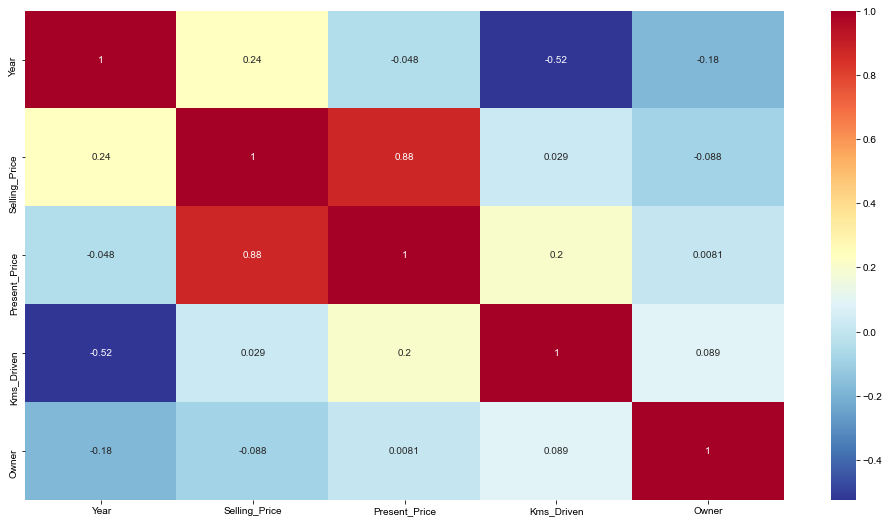

In [7]:
plt.figure(figsize=(17,9))
sns.heatmap(data.corr(),cmap=plt.cm.RdYlBu_r,annot=True)
sns.set(font_scale=2)

## Finding Missing Values

In [8]:
msng=data.isnull().sum()
prcnt=(msng/len(data))*100
pd.concat([msng,prcnt], keys=['Missing values','Missing Percent'],axis=1)
# No value is missing

,Missing values,Missing Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


## Splitting data into train and test

In [9]:
# Let's Split data into train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2,shuffle=True)

In [10]:
X_train=train.drop(['Selling_Price'],axis=1)
Y_train=train['Selling_Price']
X_test=test.drop(['Selling_Price'],axis=1)
Y_test=test['Selling_Price']

print('Shape of X_train: ',X_train.shape)
print('Length of Y_train: ',len(Y_train))
print('Shape of X_test: ',X_test.shape)
print('Shape of Y_test: ',len(Y_test))

Shape of X_train:  (240, 8)
Length of Y_train:  240
Shape of X_test:  (61, 8)
Shape of Y_test:  61


## Exploratory Data Analysis

In [11]:
## Finding unique lables of categorical feature

print('Unique Lables in Transmission: ',X_train['Transmission'].unique())
print('Unique Lables in Seller_Type: ',X_train['Seller_Type'].unique())
print('Unique Lables in Fuel_Type: ',X_train['Fuel_Type'].unique())

Unique Lables in Transmission:  ['Manual' 'Automatic']
Unique Lables in Seller_Type:  ['Individual' 'Dealer']
Unique Lables in Fuel_Type:  ['Petrol' 'Diesel' 'CNG']


<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

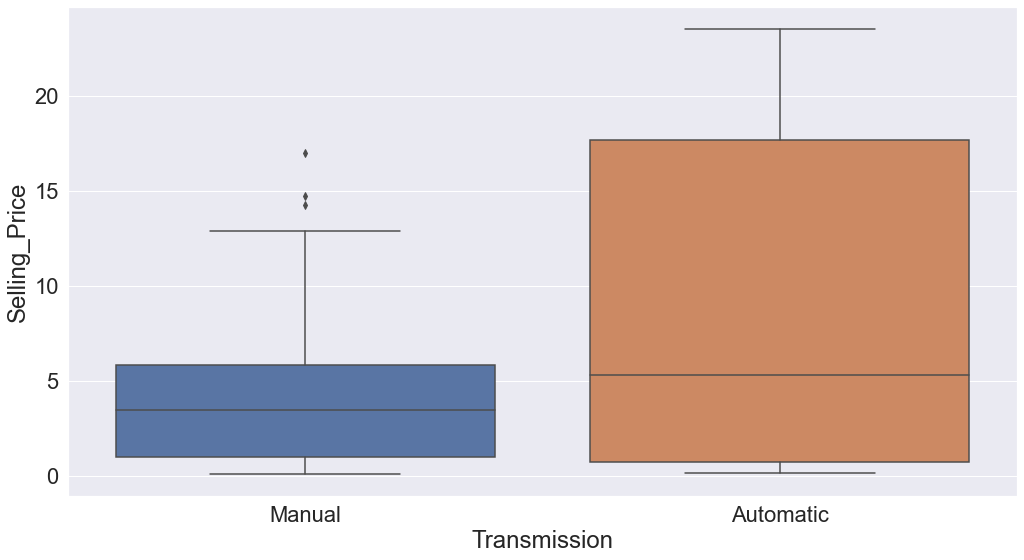

In [12]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Transmission'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

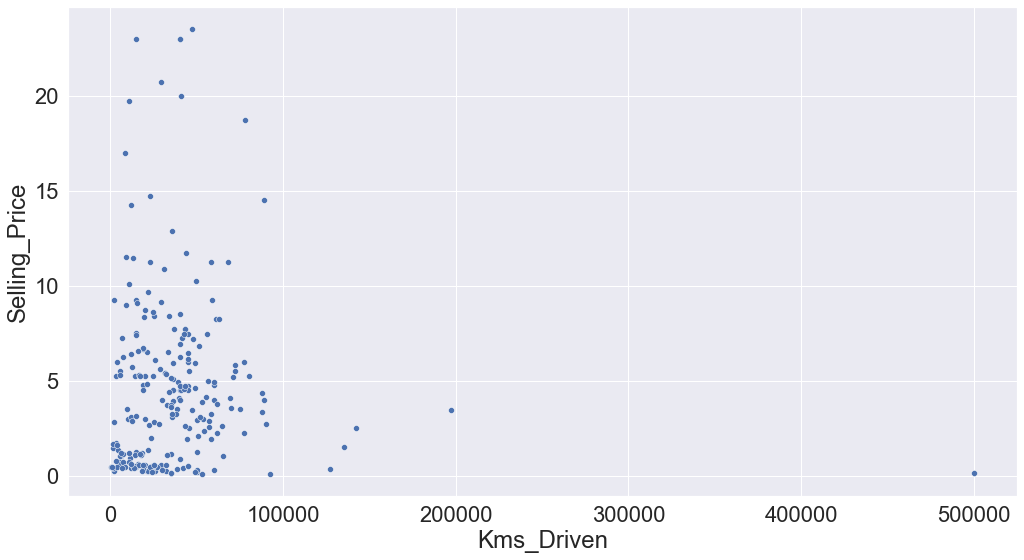

In [13]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Kms_Driven'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

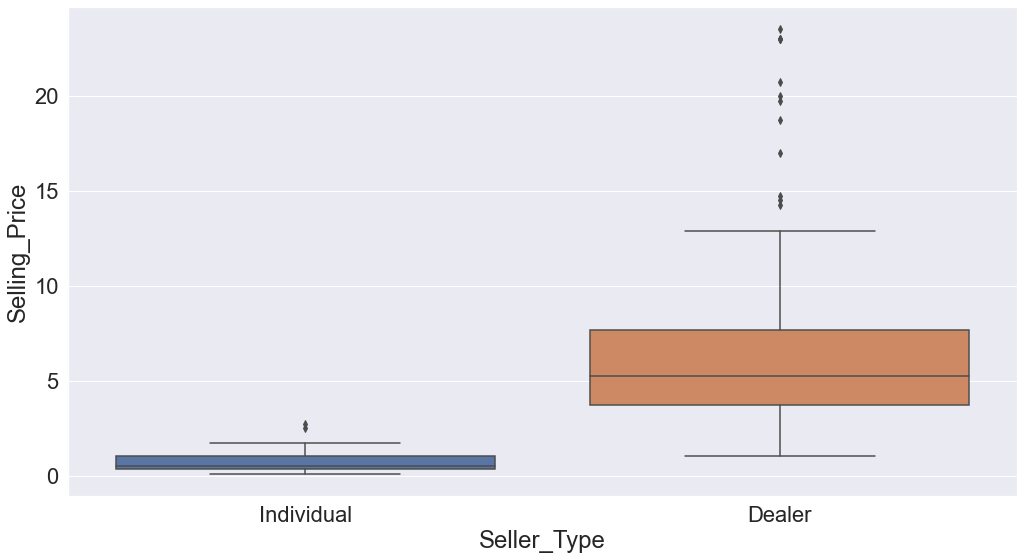

In [14]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Seller_Type'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

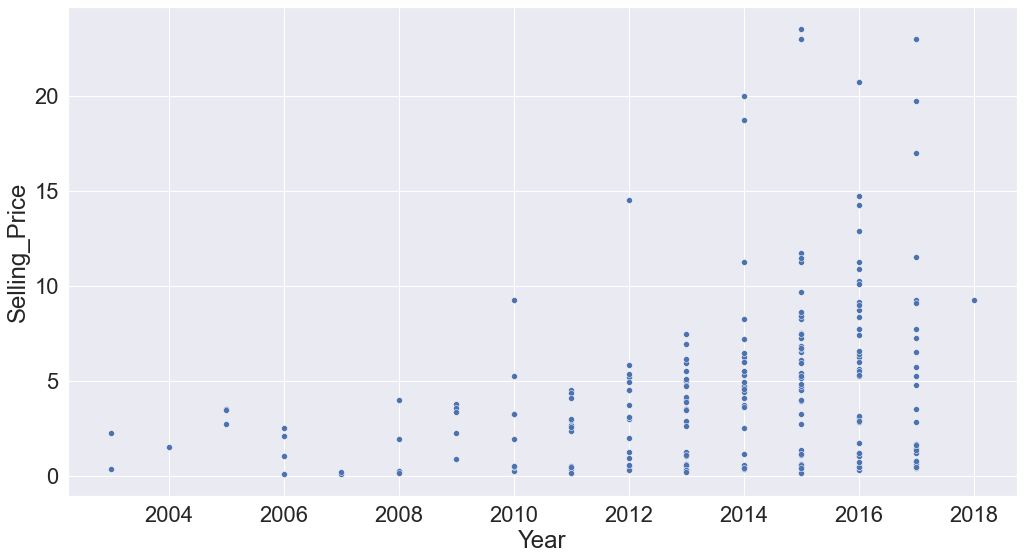

In [15]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Year'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

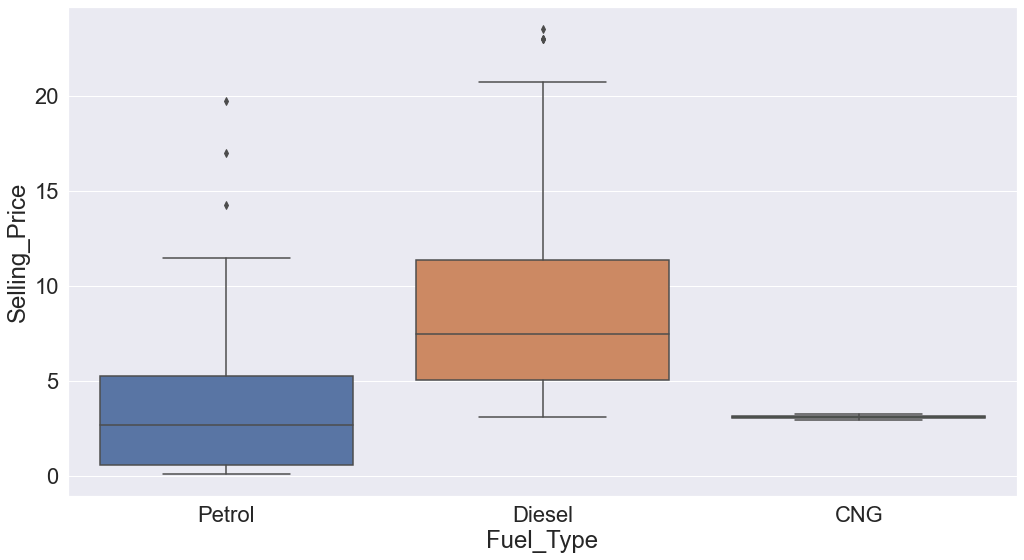

In [16]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Fuel_Type'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

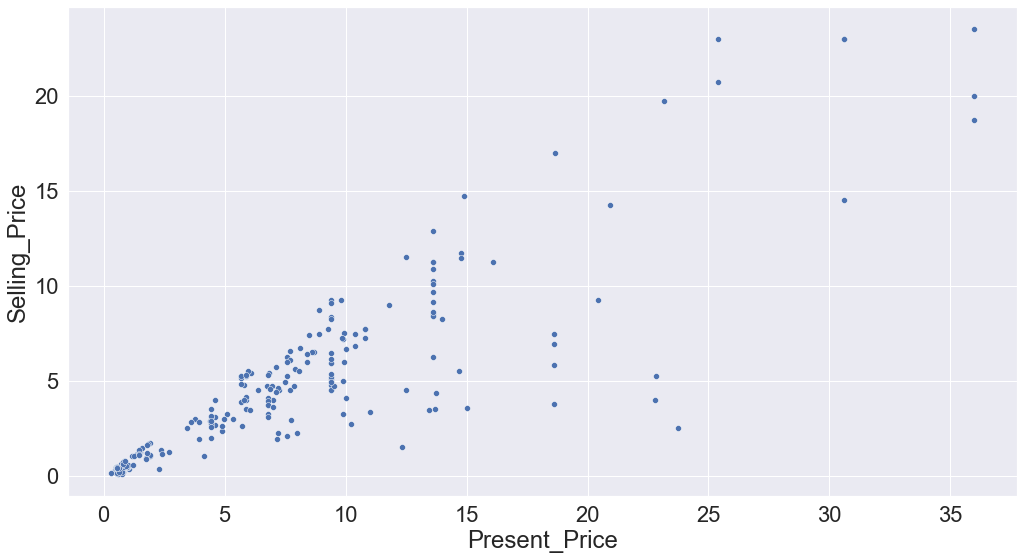

In [17]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Present_Price'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

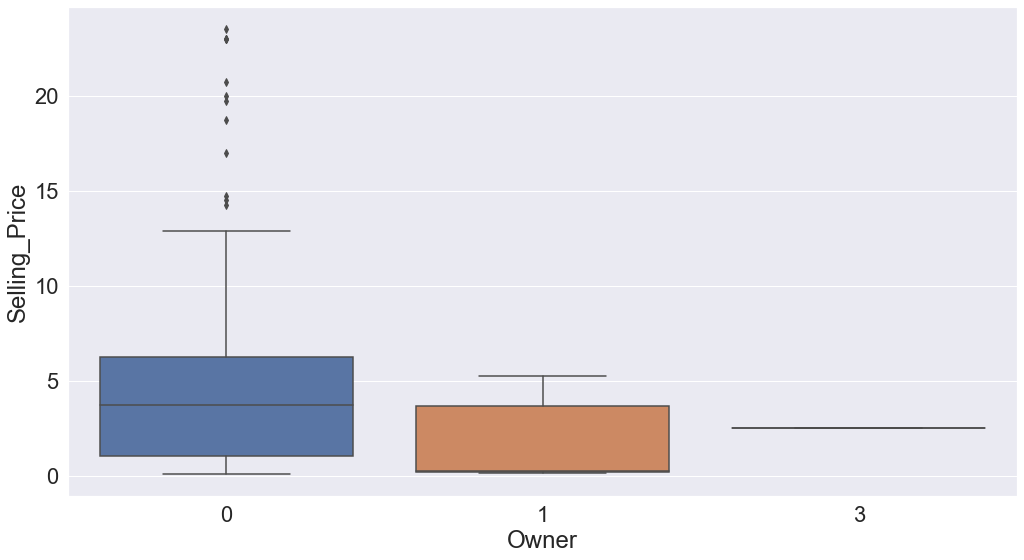

In [18]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Owner'],y=Y_train)

## Pre-Processing on X_train

In [19]:
# Car name will not help in deciding selling price.
X_train.drop(['Car_Name'],axis=1,inplace=True)

In [20]:
## Instead of purchase year, we can find how old the car is by substracting it from current year
X_train['Total_years']=date.today().year-X_train['Year']

In [21]:
# Feature Year is of no use now and can be removed
X_train.drop(['Year'],axis=1,inplace=True)

## Label Encoding Using One-Hot Encoding

In [22]:
# As there are only 2 or 3 labels, it's better to go with One-Hot Encoding
X_train=pd.get_dummies(X_train,drop_first=True)
X_train.head()

,Present_Price,Kms_Driven,Owner,Total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
141,0.80,20000,0,5,0,1,1,1
76,14.68,72000,0,8,0,1,0,1
297,5.90,60000,0,6,0,1,0,1
176,1.05,30000,0,10,0,1,1,1
220,4.43,38488,0,4,0,1,0,1


## Training Using Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rdfr=RandomForestRegressor()

In [24]:
rdfr.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
rdf_prd=rdfr.predict(X_train)

In [26]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error for Random Forest on train: ',mean_squared_error(Y_train,rdf_prd))

Mean Squared Error for Random Forest on train:  0.13474996612499998


## Hyperparameter Testing for Random Forest

In [27]:
rf_param={'n_estimators':[500,600,700,800,900,100],
          'max_depth':[2,3,4,5],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
          'max_features':[2,3,4,5,6,7,8]}

In [28]:
from sklearn.model_selection import GridSearchCV

RF_Grid=GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=rf_param,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     cv=5,
                     verbose=3)

In [29]:
RF_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 13608 candidates, totalling 68040 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [500, 600, 700, 800, 900, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [30]:
RF_Grid.best_estimator_

RandomForestRegressor(max_depth=5, max_features=8, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=500)

In [31]:
RF_bst=RandomForestRegressor(n_estimators=500,max_depth=5,max_features=8,min_samples_leaf=2,min_samples_split=4)

In [32]:
RF_bst.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, max_features=8, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=500)

In [33]:
RF_bst_prd=RF_bst.predict(X_train)

In [34]:
print('Mean Squared Error of RF on train: ',mean_squared_error(Y_train,RF_bst_prd))

Mean Squared Error of RF on train:  0.503099056634916


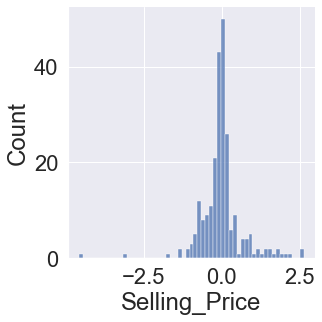

In [35]:
sns.displot(Y_train-RF_bst_prd)

In [36]:
import pickle
file=open('random_forest.pkl','wb')  # opening a file to store the data as it is
pickle.dump(RF_bst,file)